# K Nearest Neighbors

Rock Boynton CS 4850


## Introduction

In this notebook, we will apply an implemation of the K Nearest Neighbors (KNN) classification and regression machine learning algorithm to some data, specifically the Iris dataset from scikit-learn. 

We will:

    * see how accurate our model was compared to known values

    * perform some analyses on the data itself from the results of the model, such as determining which features (or combinations of features) are able to best divide the classes
    
    * analyze the KNN algorithm, including its drawbacks and advantages

This will provide a good introduction to some machine learning techniques.

## Feature plots

First, we must load in our KNN class, and iris dataset from `sklearn.datasets`

In [5]:
from Lab2.knn import KNN
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(dir(iris_dataset.data))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__rmod__', '__rmul__'

Now, we can make scatter plots of each feature vs every other feature, coloring the points by their targets(labels)

12


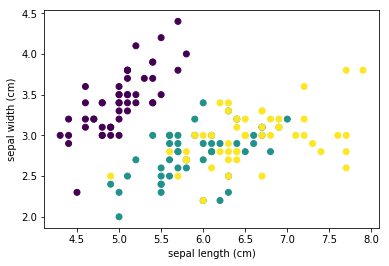

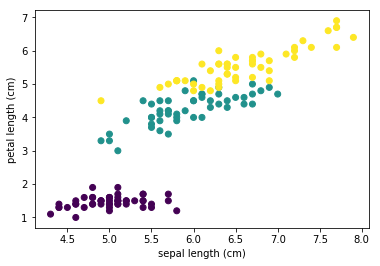

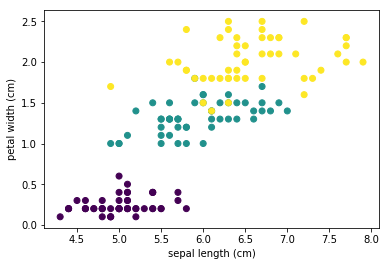

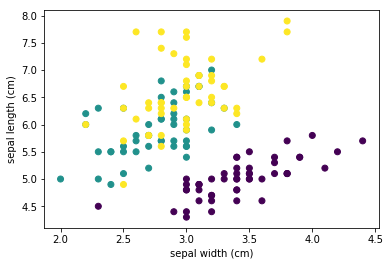

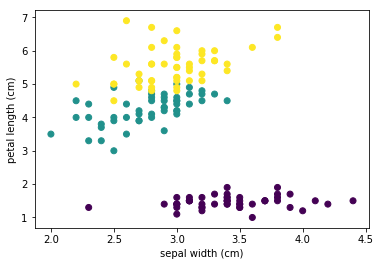

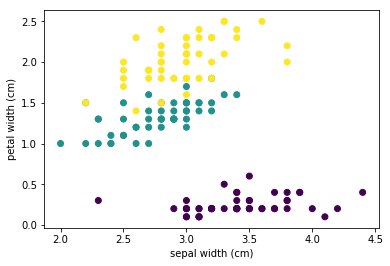

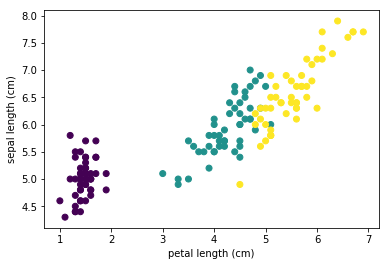

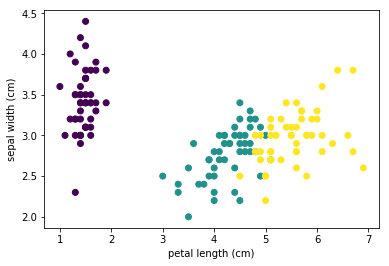

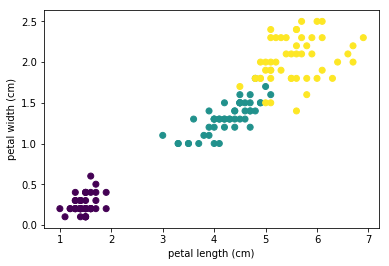

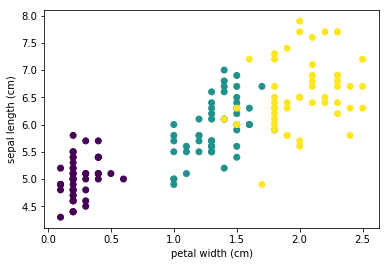

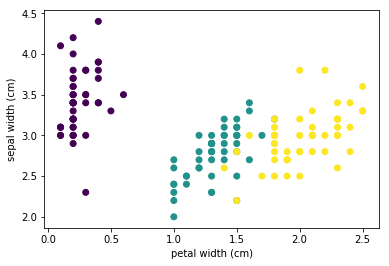

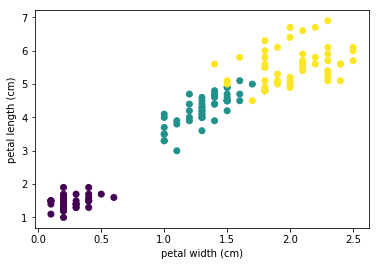

In [14]:
import matplotlib.pyplot as plt
from itertools import permutations

# FIXME add sublots and plot the right stuff
labels = list(permutations(iris_dataset.feature_names, 2))
indices = list(permutations(range(len(iris_dataset.feature_names)), 2))
plot_rows = len(labels)
print(plot_rows)
for (x_label, y_label), (x1, x2) in zip(labels, indices):
    plt.scatter(iris_dataset.data[:,x1], iris_dataset.data[:,x2], c=iris_dataset.target)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Classification

To use the KNN algorithm we developed, we first need to divide the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target)

Next, we use the `KNN` class we created to classify the flowers by species, comparing the accuracy (k = 1..10) of the predicted labels to the known labels for the testing set.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = []
for k in range(10):
    knn = KNN(k, "mode")
    knn.fit(train_X, train_y)
    pred_y = knn.predict(test_X)
    accuracy.append(accuracy_score(test_y, pred_y))

plt.scatter(range(10), accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")

## Questions

a. Based on the scatter plots of the features, which features (or combinations of features)
are able to best separate the classes?

        * 

b. Which value of k gives the best (highest) accuracy?

        * 

c. What do you think the potential downsides of the k-nearest neighbors algorithm are?
Why do you think it might not be used as widely as other methods?

        *